# First Problem

In the article [1] we can see an example of tensor in figure 4. The construction of this tensor is described there. They try to compute a non-negative CPD for this tensor in this article. This is possible since the figure can be considered as having only $0$'s and $1$'s. 

Here we will construct the same tensor (the *swimmer_tensor* module) and use the *cpd* function with $r = 50$ to computes its CPD. This value of $r$ is suggested in the same article.


[1] *Non-Negative Tensor Factorization with Applications to Statistics and Computer Vision* - A. Shashua and T. Hazan 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TensorFox as tfx

In [2]:
# Load the tensor T, which has shape 256 x 32 x 32. 
T = np.load('swimmer.npy')
m, n, p = T.shape
Tsize = np.linalg.norm(T)

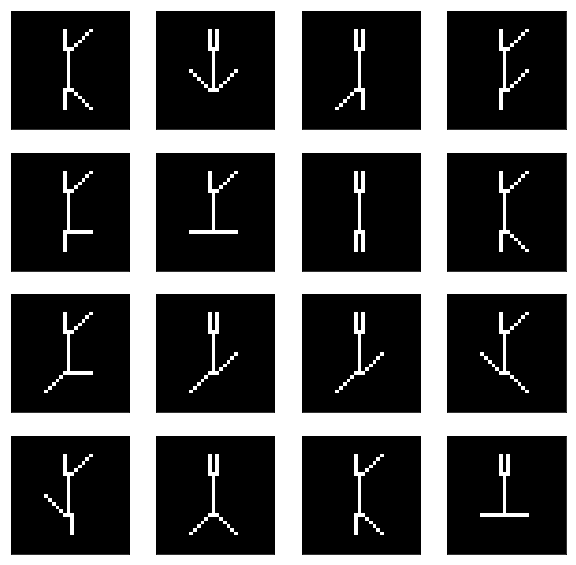

In [3]:
# Visualize some frames, i.e., some frontal slices of the tensor.
num_rows = 4
num_cols = 4    
fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 10), sharex='col', sharey='row')     
for i in range(num_rows):
    for j in range(num_cols):
        s = np.random.randint(0,m)
        ax[i,j].xaxis.set_major_locator(plt.NullLocator())
        ax[i,j].yaxis.set_major_locator(plt.NullLocator())
        ax[i,j].imshow(-T[:,:,s], cmap='gray')

In [4]:
# Compute the CPD of T, assuming T has rank 50. 
r = 50
Lambda, X, Y, Z, T_approx, info = tfx.cpd(T, r, display=3)

--------------------------------------------------------------------------------------------------------------
Computing HOSVD of T
    Compression detected
    Compressing from (256, 32, 32) to (13, 16, 23)
    100.0 % of the energy was retained
    Compression relative error = 1.18425e-14
--------------------------------------------------------------------------------------------------------------
Type of initialization: smart random
    Initial guess relative error = 0.16837
--------------------------------------------------------------------------------------------------------------
Computing CPD of T
    Iteration | Rel Error  | Rel Error Diff |     ||g||    | Damp| #CG iterations
        1     |  0.167593  |        -       |  35.835060  | 2.0 |    1
        2     |  0.166616  |    0.000976    |  36.202316  | 2.0 |    2
        3     |  0.162542  |    0.004074    |  40.293795  | 1.0 |    2
        4     |  0.141866  |    0.020676    |  62.790965  | 0.5 |    3
        5     |  0.11

        102     |  0.000197  |    0.000004    |  0.017916  | 1.58e-30 |    11
        103     |  0.000195  |    0.000002    |  0.007324  | 7.89e-31 |    14
        104     |  0.000194  |    0.000001    |  0.011245  | 3.94e-31 |    14
        105     |  0.000191  |    0.000003    |  0.008087  | 1.97e-31 |    18
        106     |  0.000189  |    0.000002    |  0.022125  | 9.86e-32 |    10
        107     |  0.000187  |    0.000001    |  0.010422  | 4.93e-32 |    16
        108     |  0.000183  |    0.000004    |  0.004369  | 2.47e-32 |    24
        109     |  0.000180  |    0.000003    |  0.019105  | 1.23e-32 |    12
        110     |  0.000179  |    0.000001    |  0.007437  | 6.16e-33 |    14
        111     |  0.000177  |    0.000002    |  0.009740  | 3.08e-33 |    18
        112     |  0.000175  |    0.000001    |  0.010353  | 1.54e-33 |    12
        113     |  0.000174  |    0.000001    |  0.006652  | 7.7e-34 |    16
        114     |  0.000173  |    0.000001    |  0.015814  | 3.85

# Analyzing and Visualizing the Solution

The solution above can be considered as satisfactory since the relative error is of order $O(10^{-4})$. Notice that the error associated to the starting point is close to $0.16$. The remarkable thing here is the compression, which greatly reduced the tensor without losing precision (the error after compressing is of order $O(10^{-14})$).  

Now let's plot the evolution of the relative errors and its consecutive differences through the iterations.
In $log_{10}$ scale we can see that the convergence is linear. This is a nice property to have, it indicates the rate of convergence is reasonably fast. After that we plot the evolution of the step sizes at each iteration and finally the size of the gradient at each iteration. We expect that both converges to $0$.

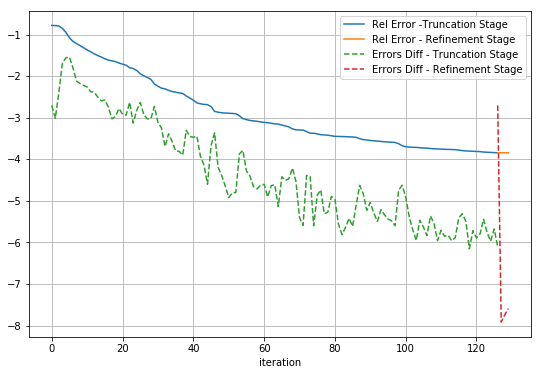

In [5]:
# Relative error plot
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6

a = len(info.errors[0])
b = len(info.errors[1])

plt.plot(np.arange(0, a), np.log10(info.errors[0]/Tsize),'-' , markersize=2, label='Rel Error -Truncation Stage')
plt.plot(np.arange(a-1, a+b-1), np.log10(info.errors[1]/Tsize), '-', markersize=2, label='Rel Error - Refinement Stage')
plt.plot(np.arange(0, a), np.log10(info.errors_diff[0]/Tsize), '--', markersize=2, label='Errors Diff - Truncation Stage')
plt.plot(np.arange(a-1, a+b-1), np.log10(info.errors_diff[1]/Tsize), '--', markersize=2, label='Errors Diff - Refinement Stage')
plt.xlabel('iteration')
plt.grid()
plt.legend()
plt.show()

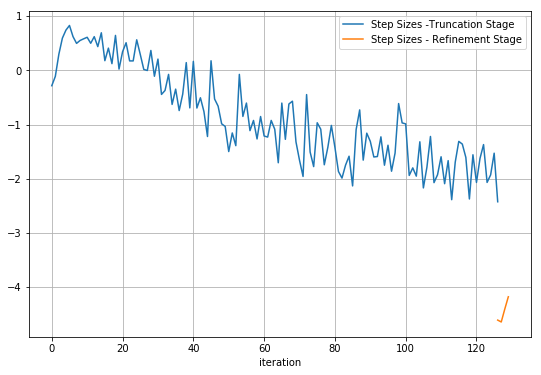

In [6]:
# Step sizes plot
a = len(info.errors[0])
b = len(info.errors[1])

plt.plot(np.arange(0, a), np.log10(info.step_sizes[0]),'-' , markersize=2, label='Step Sizes -Truncation Stage')
plt.plot(np.arange(a-1, a+b-1), np.log10(info.step_sizes[1]), '-', markersize=2, label='Step Sizes - Refinement Stage')
plt.xlabel('iteration')
plt.grid()
plt.legend()
plt.show()

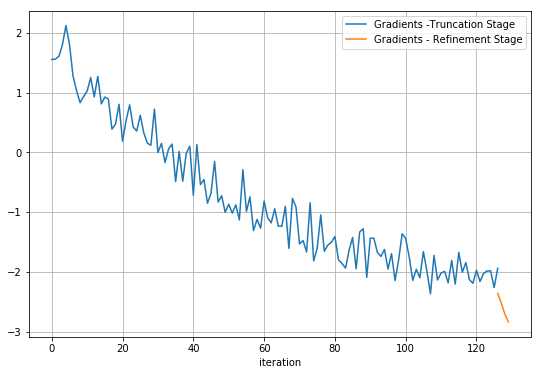

In [7]:
# Gradients plot
a = len(info.errors[0])
b = len(info.errors[1])

plt.plot(np.arange(0, a), np.log10(info.gradients[0]),'-' , markersize=2, label='Gradients -Truncation Stage')
plt.plot(np.arange(a-1, a+b-1), np.log10(info.gradients[1]), '-', markersize=2, label='Gradients - Refinement Stage')
plt.xlabel('iteration')
plt.grid()
plt.legend()
plt.show()

Below we show some slices of our computed tensor. We show the same slices plotted before so we can compare them. As we can see, it is almost impossible to notice some difference just by looking. The CPD computed is a success!

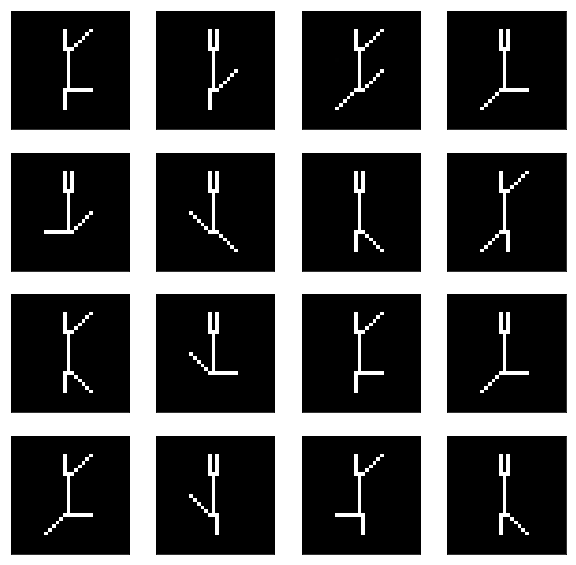

In [8]:
# Visualize some frames, i.e., some frontal slices of the approximate tensor.
num_rows = 4
num_cols = 4    
fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 10), sharex='col', sharey='row')     
for i in range(num_rows):
    for j in range(num_cols):
        s = np.random.randint(0,m)
        ax[i,j].xaxis.set_major_locator(plt.NullLocator())
        ax[i,j].yaxis.set_major_locator(plt.NullLocator())
        ax[i,j].imshow(-T_approx[:,:,s], cmap='gray')

Remember we can write $T \approx \sum_{\ell=1}^r X_\ell \otimes Y_\ell \otimes Z_\ell$. In other words, we can write $T$ as a sum of $r$ ($r = 50$ in this case) rank one tensors. Each rank one tensor can be considered as a fundamental block of $T$ so it is interesting sometimes to know how these fundamental blocks are. For each $\ell = 1 \ldots r$, $X_\ell \otimes Y_\ell \otimes Z_\ell$ is a tensor of same shape as $T$ and we can visualize its slices just as we did for $T$. This can bring some insight about the decomposition just computed.

The function *rank1_plot* was constructed with this situation in mind. Just choose some slice $s$, where $0 \leq s \leq 255$ and use the command

 > tf.rank1_plot(Lambda, X, Y, Z, m, n, p, r, k=s).
 

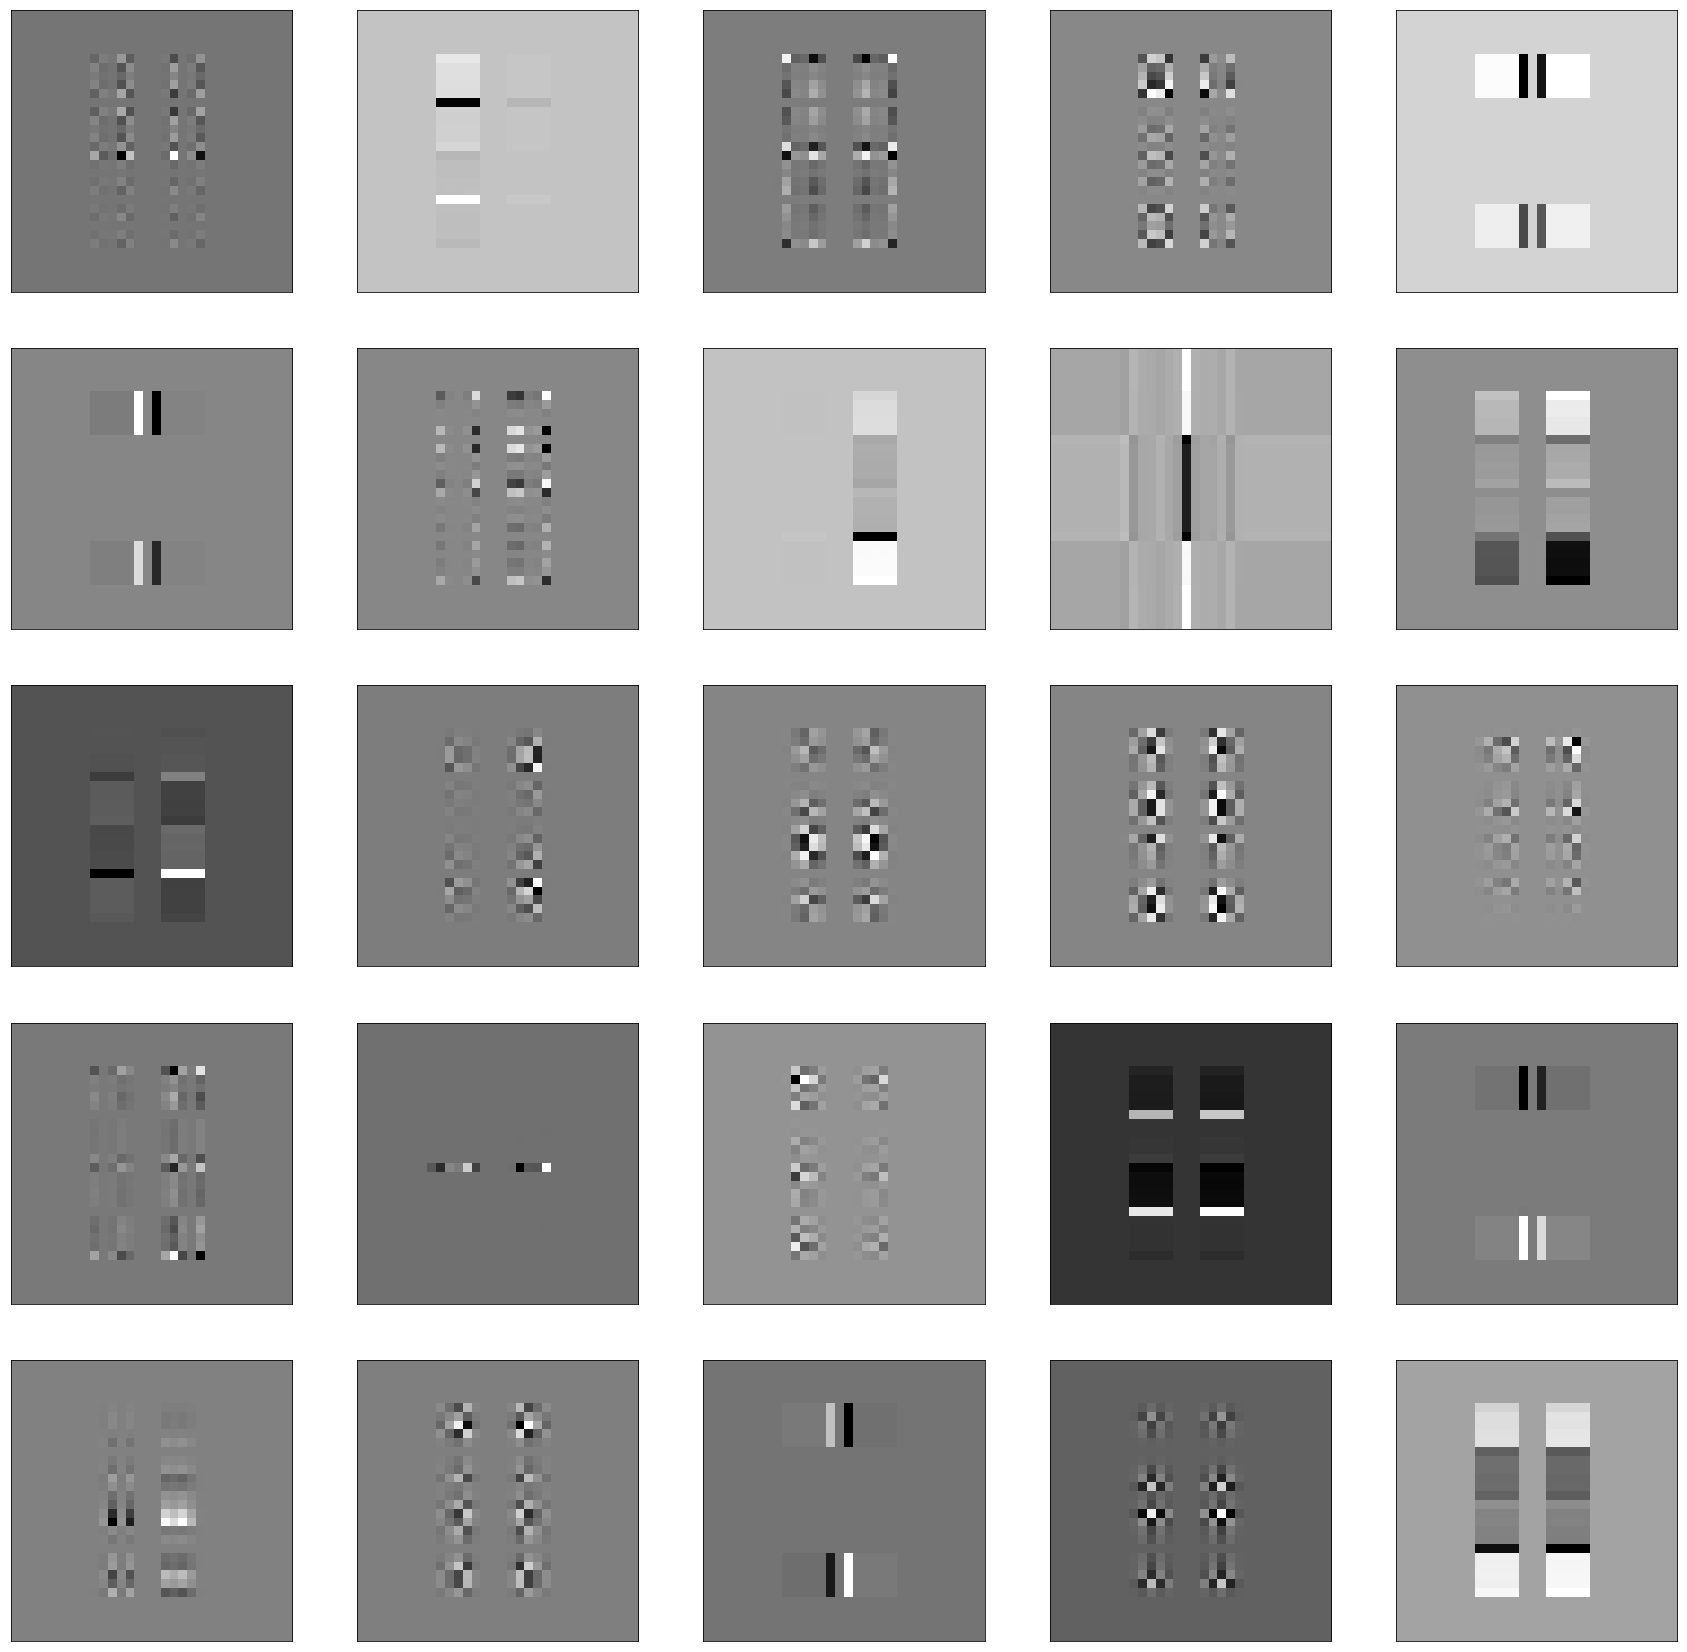

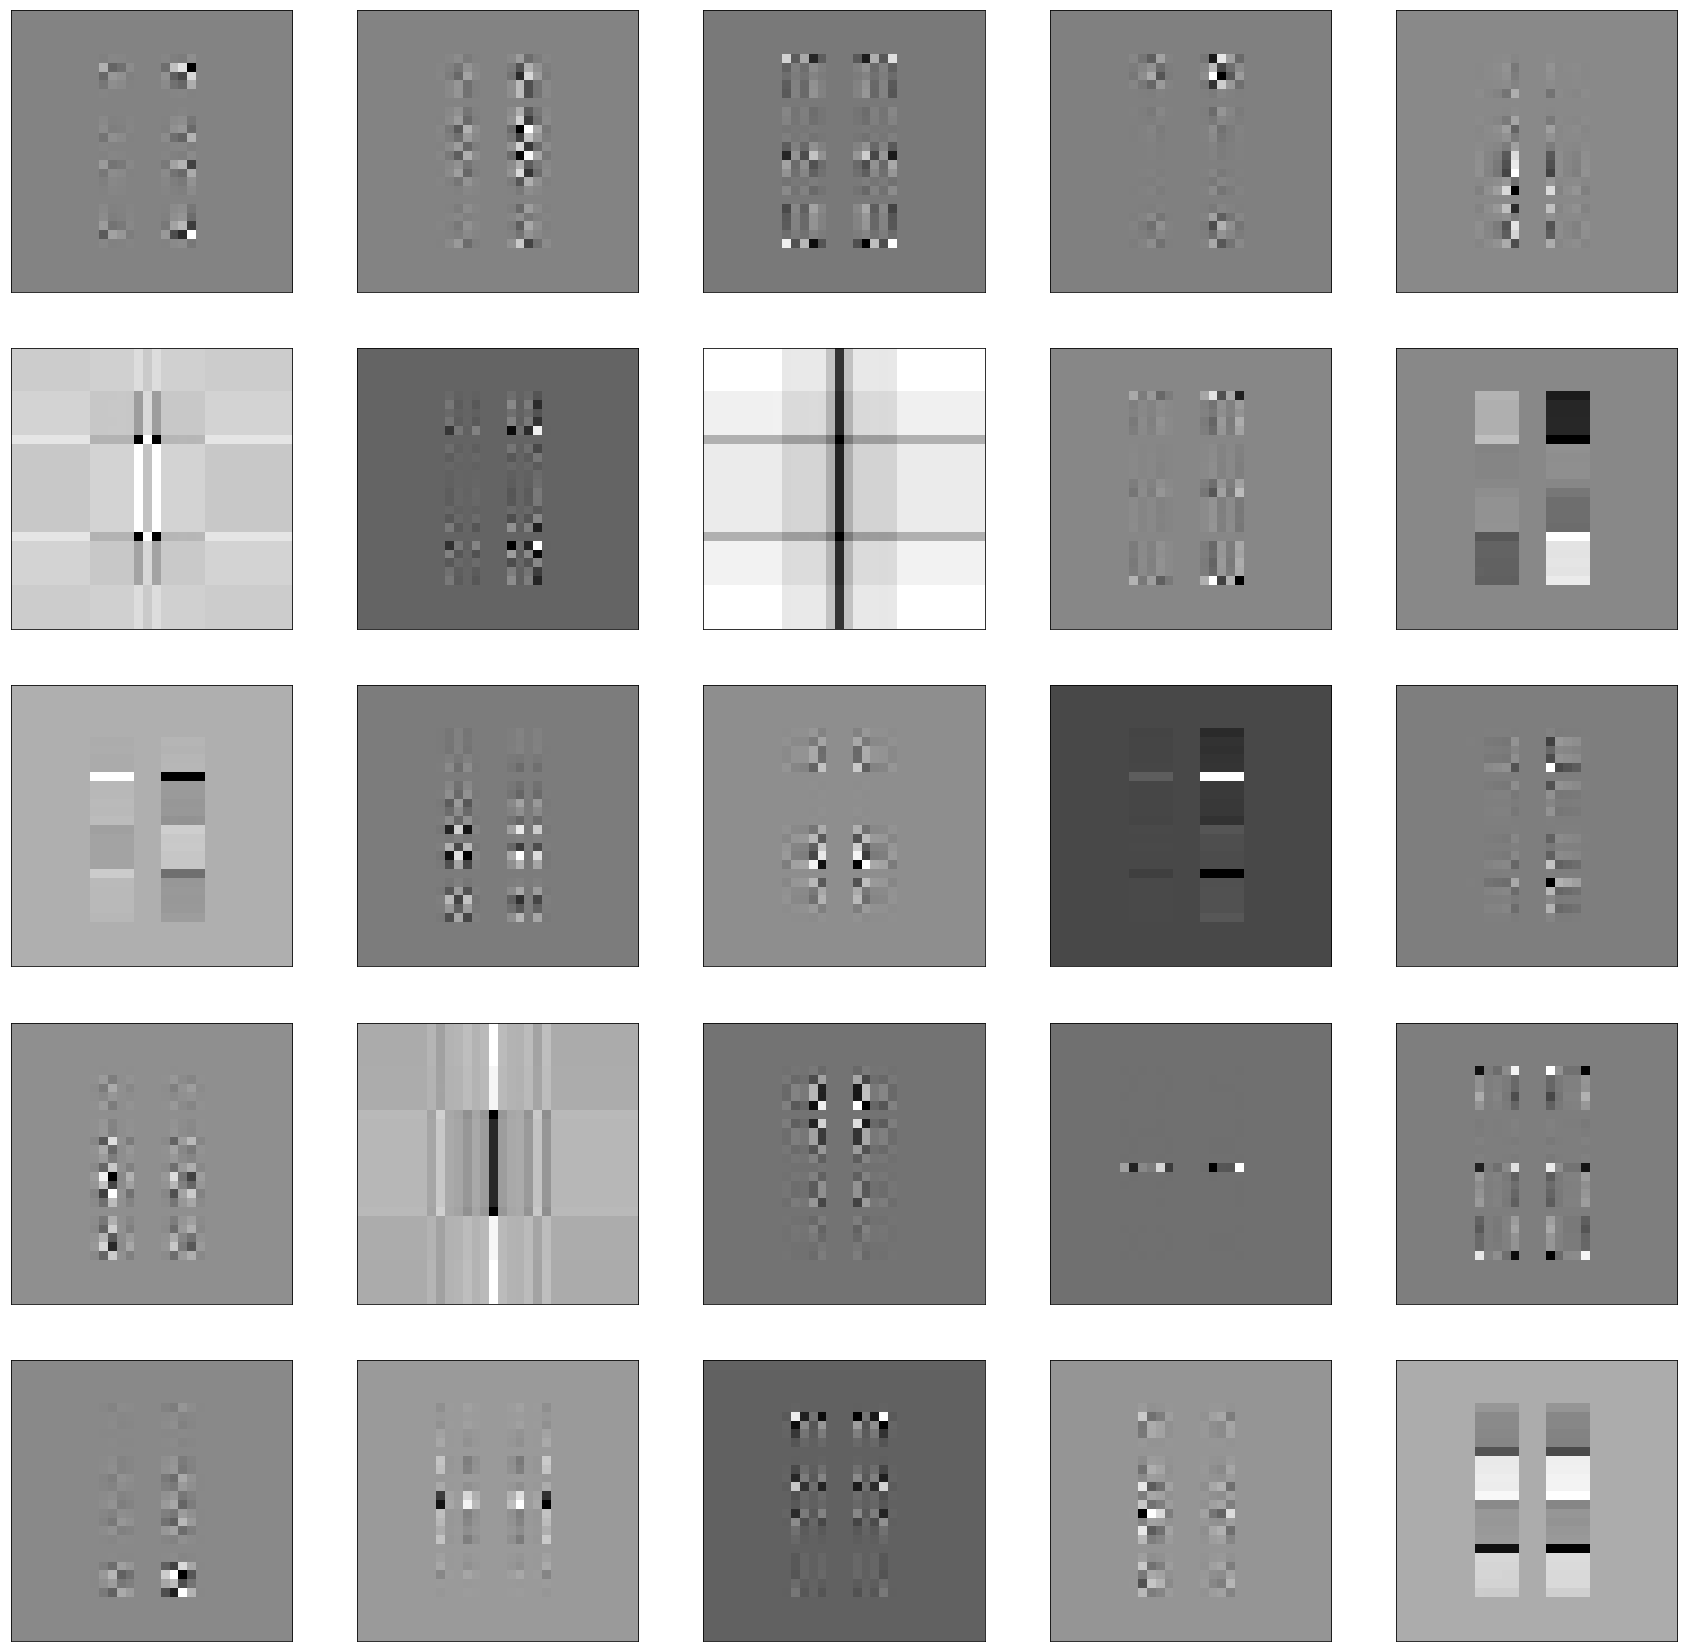

In [9]:
s = 0
tfx.rank1_plot(Lambda, X, Y, Z, m, n, p, r, k=s)

To finish, we may have noted that the computation of this CPD is not always good. Sometimes we need to repeat the computation to get a good CPD. This is due to the initialization point for the iteration. Althought the strategy used in TensorFox always generates a initial point close to the objetive point, the path of the iteration may lead to a local optima. This phenomenon is not exclusive to TensorFox, and probably all solvers suffers from this issue. 

For this problem in particular we can use the function *stats* to see how the initialization changes the results.

10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %


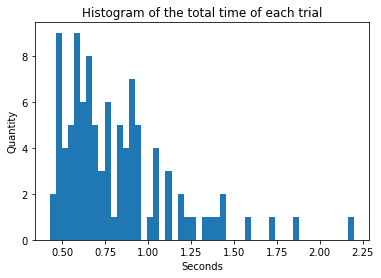

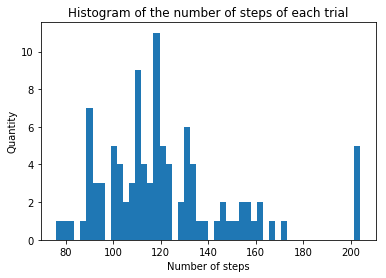

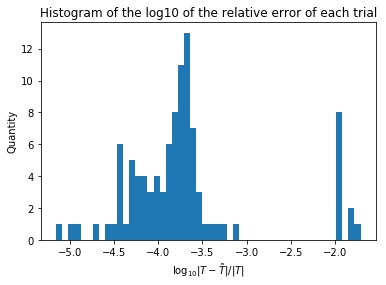

In [10]:
fig_size[0] = 6
fig_size[1] = 4
times, steps, rel_errors = tfx.stats(T, r)

In [11]:
print('E[seconds] =', times.mean())
print()
print('E[number of steps] =', steps.mean())
print()
print('E[relative error] =', rel_errors.mean())

E[seconds] = 0.8161537814140319

E[number of steps] = 122.0

E[relative error] = 0.001557012646047954


From the histograms we see that the computational time concentrates around $0.8$ seconds, the number of steps concentrates around $120$ and the error concentrates around $-4$ (in $log_{10}$ scale). It is not hard to guess we can have an error of order $O(10^{-4})$ if we try to compute a few CPD's, maybe three or four attempts is enough. 